# Problema de ordenación de arrays

Problema: dado un array de enteros, devolver el array ordenado.

Ejemplo de entrada:

$
\begin{bmatrix}
2 & 3 & 1 & 4
\end{bmatrix}
$

Ejemplo de salida

$
\begin{bmatrix}
1 & 2 & 3 & 4
\end{bmatrix}
$



## Algoritmo clásico

Para cada $i=0$ hasta $i=n$, hacer:
- Paso 1. Calculamos el mínimo de `arr[i:n]`
- Paso 2. Intercambiamos el mínimo e con el número de la posición `i`

In [9]:
def clasico(arr):
    n = len(arr)
    for i in range(0, n):
        value_i = arr[i]
        
        min_index = -1
        min_value = float('inf')

        # calcualmos el mínimo de lo que queda del array
        for j in range(i, n):
            if arr[j] < min_value:
                min_index = j
                min_value = arr[j]

        # intercambiamos
        arr[i] = min_value
        arr[min_index] = value_i

In [10]:
example = [2, 3, 1, 4]
clasico(example)
example

[1, 2, 3, 4]

**Proposición.** El algoritmo clásico es $\Theta(n^2)$.

*Demonstración.*

```python
def clasico(arr):
    n = len(arr) #a_1
    for i in range(0, n):
        value_i = arr[i] # a_2
        
        min_index = -1 # a_2
        min_value = float('inf') # a_2

        # calcualmos el mínimo de lo que queda del array
        for j in range(i, n):
            if arr[j] < min_value: # a_3
                min_index = j # a_3
                min_value = arr[j] # a_3
 
        # intercambiamos
        arr[i] = min_value # a_2
        arr[min_index] = value_i # a_2
```

$t(n)$ tiene una expresión así:

$$a_1 + \sum_{i=0}^{n-1}\left(a_2\sum_{j=i}^{n-1}a_3\right) = a_4n^2 + a_5n + a_6$$

Por tanto, $t(n)\in\Theta(n^2)$.

## MergeSort

Idea principal, dados dos arrays ordenados, ¿cómo combinaríais ambos en un solo array?

Ejemplo `[3, 8]` y `[1, 5]` en la pizarra :)

In [1]:
def merge_sort(arr):
    if len(arr) <= 1:
        return arr  # Caso base: array ya está ordenado

    # Partimos el array en 2 partes
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid])
    right_half = merge_sort(arr[mid:])

    # Combinamos los arrays
    return merge(left_half, right_half)

def merge(left, right):
    sorted_array = []
    i = j = 0

    # Un puntero a cada array y vamos comparando poco a poco añadiendo uno de cada sitio
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            sorted_array.append(left[i])
            i += 1
        else:
            sorted_array.append(right[j])
            j += 1

    # Añadimos los elementos que queden
    sorted_array.extend(left[i:])
    sorted_array.extend(right[j:])

    return sorted_array

In [2]:
example = [2, 3, 1, 4]
merge_sort(example)

[1, 2, 3, 4]

**Proposición.** MergeSort es $\Theta(n\log n)$.

*Demonstración.*

Primero observamos que el merge es de la forma $t_{\text{merge}}(n) = a_1n+a_2$ ya que, al fin y al cabo, se recorren dos arrays de longitud $n/2$. Por otro lado:

```python
def merge_sort(arr):
    if len(arr) <= 1:
        return arr  # Caso base: array ya está ordenado, constante

    # Partimos el array en 2 partes
    mid = len(arr) // 2
    left_half = merge_sort(arr[:mid]) # t(n/2)
    right_half = merge_sort(arr[mid:]) # t(n/2)

    # Combinamos los arrays
    return merge(left_half, right_half) # a_1 n+a_2
```


De modo que el tiempo del algoritmo $t(n)$ se puede expresar de la siguiente manera:

1. Si caso base: constante $a$.
2. En otro caso: $2t(n/2) + \Theta(n)$

Así pues, usando la fórmula maestra, se puede concluir que $t(n) \in \Theta(n\log n)$.

## QuickSort

Idea principal: ordenar un elemento (pivote) cada vez.

Ejemplo `[3, 8, 1, 5]` en la pizarra :)

In [5]:
import random

def partition_first(arr, low, high):
    pivot_index = random.randint(low, high) # seleccionamos el pivote de manera aleatoria
    arr[low], arr[pivot_index] = arr[pivot_index], arr[low] # intercambiamos el pivote con el primer elemento
    pivot = arr[low]  # Escogemos el primer elemento como pivot
    left = low + 1    # Puntero al segundo elemento
    right = high      # Puntero al último

    while True:
        # Movemos el puntero izq
        while left <= high and arr[left] <= pivot:
            left += 1
        
        # Movemos el puntero derecho
        while arr[right] > pivot:
            right -= 1
        
        # Intercambiamos
        if left < right:
            arr[left], arr[right] = arr[right], arr[left]
        else:
            break
    
    # Ponemos el pivote donde está el puntero derecho
    arr[low], arr[right] = arr[right], arr[low]
    return right  # Return the partition index


def quick_sort(arr, low, high):
    if low < high:
        # Partition the array
        pi = partition_first(arr, low, high)
        
        # Recursively sort elements before and after partition
        quick_sort(arr, low, pi - 1)
        quick_sort(arr, pi + 1, high)


# Example usage
example = [2, 3, 1, 4]
quick_sort(example, 0, len(example)-1)
example

[1, 2, 3, 4]

**Proposición.** QuickSort es $\Theta(n\log n)$ en el mejor caso, $\Theta(n\log n)$ en el caso promedio y $\Theta(n^2)$ en el peor caso.

*Demonstración.*

Primero observamos que `partition_first` es de la forma $a_1n + a_2$ ya que simplemente se recorre un array y se intercambian elementos. 

De modo que el tiempo del algoritmo $t(n)$ se puede expresar de la siguiente manera:

1. Si caso base: constante $a$.
2. En otro caso: $t(p_1(n)) + t(p_2(n)) + bn + c$, donde $p_1(n), p_2(n)$ representa el corte del la función pivote.

Así pues:

- **Peor caso**: en cada paso el pivote escoge el mínimo. Si esto pasa (que en la práctica no pasa), una particicón tiene tamaño $0$ y la otra $n-1$. Así pues $t(n) = t(n-1) + bn + c'$. Desarrollando la recurrencia, $t(n)\in\Theta(n^2)$.
- **Mejor caso**: las particiones son de tamaño similar $n/2$. Así pues $t(n) = 2t(n/2) + bn + c$. Usando la fórmula mágica, $t(n)\in\Theta(n\log n)$.
- **Caso promedio**: Supongamos un array de $n$ elementos aleatorios disntitos. Sea $X$ una variable aleatoria que indica la posición del pivote seleccionado en el array ordenado. Como el pivote se ha seleccionado aleatoriamente siguiendo una distribución uniforme, se tiene que:

$$P(X=i) = \frac{1}{n}$$

De esta manera, el valor esperado es el siguiente:

$$E[X]=\sum_{i=0}^{n-1}i\frac{1}{n}=\frac{n-1}{2}$$

Es decir, que la posición esperada del pivote es aproximadamente en el centro. Así pues, en promedio, se tiende a partir el problema a la mitad (lo cual coincide con el mejor caso) y $t(n)\in\Theta(n\log n)$.

# Estimando tiempos empíricamente

In [41]:
import time
import numpy as np

def measure_time_complexity(sort_func):
    sizes = [2**i for i in range(10, 15)]  # Array sizes from 64 to 8192
    times = []
    
    for size in sizes:
        arr = np.random.randint(0, 10_000, size).tolist()  # Random integers for sorting
        
        start_time = time.time()
        sort_func(arr)  
        end_time = time.time()
        
        times.append(end_time - start_time)
        
    return sizes, times

size_class, times_class = measure_time_complexity(clasico)
size_merge, times_merge = measure_time_complexity(merge_sort)

In [43]:
def measure_time_complexity_quick():
    sizes = [2**i for i in range(10, 15)]  # Array sizes from 64 to 8192
    times = []
    
    for size in sizes:
        arr = np.random.randint(0, 10_000, size).tolist()  # Random integers for sorting
        
        start_time = time.time()
        quick_sort(arr, 0, len(arr) - 1)  
        end_time = time.time()
        
        times.append(end_time - start_time)
        
    return sizes, times
    
size_q, times_q = measure_time_complexity_quick()

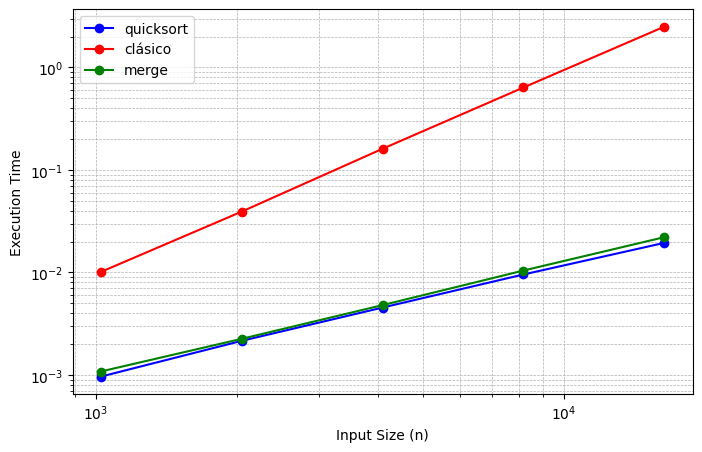

In [44]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(size_q, times_q, marker='o', linestyle='-', color='b', label='quicksort')
plt.plot(size_class, times_class, marker='o', linestyle='-', color='r', label='clásico')
plt.plot(size_merge, times_merge, marker='o', linestyle='-', color='g', label='merge')


plt.xscale('log')
plt.yscale('log')

plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time")
plt.title("")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

In [45]:
# compute slope
from scipy.stats import linregress


print(f'Potencia quick: {linregress(np.log(size_q), np.log(times_q)).slope:.2f}')
print(f'Potencia merge: {linregress(np.log(size_merge), np.log(times_merge)).slope:.2f}')
print(f'Potencia clásico: {linregress(np.log(size_class), np.log(times_class)).slope:.2f}')

Potencia quick: 1.08
Potencia merge: 1.09
Potencia clásico: 1.99


## Comparación entre Quicksort y Mergesort

| Característica      | Quicksort                 | Mergesort                  |
|---------------------|--------------------------|-----------------------------|
| **Paradigma**      | Divide y vencerás        | Divide y vencerás           |
| **Complejidad (Mejor Caso)** | O(n log n)    | O(n log n)                 |
| **Complejidad (Peor Caso)**  | O(n²) (si el pivote es malo) | O(n log n) |
| **Complejidad (Caso Promedio)** | O(n log n) | O(n log n)                 |
| **Uso de memoria** | En memoria (in-place) en algunas implementaciones | Requiere espacio extra O(n) |
| **Eficiencia en arrays grandes** | Muy eficiente en arrays grandes | Eficiente, pero puede ser más lento debido al uso de memoria extra |



# Problema de selección

Problema: dado un array de $n$ enteros y una posición $s\leq n-1$, devolver un entero $r$ tal que, si el array estuviera ordenado, el entero a devolver ocuparía la posición $s$.

Ejemplo de entrada:

$s=2$

$
\begin{bmatrix}
7 & 10 & 1 & 4
\end{bmatrix}
$

Salida:

$r=7$

## Solución ingénua

Algoritmo:

1. Ordenamos el array (p. ej., usando mergesort).
2. Escogemos el entero que ocupa la posición $s$.

In [7]:
def seleccion_ingenua(arr, s):
    sort = merge_sort(arr)
    return sort[s]

In [8]:
example = [7, 10, 1, 4]
seleccion_ingenua(example, 2)

7

**Proposición.** La solución ingénua es $\Theta(n\log n)$.

*Demostración.*

```python
def seleccion_ingenua(arr, s):
    sort = merge_sort(arr) # Theta(n log n)
    return sort[s] # constante
```

Como primero se ordena y luego se hace una operación constante, es obvio que la solución ingénua es $\Theta(n\log n)$.

## Solución con pivote

Idea principal: usar el pivote y cada vez acotar la búsqueda.

In [12]:
def seleccion_pivote(arr, low, high, s):
    pi = partition_first(arr, low, high)

    if pi == s:
        return arr[s]
    elif pi > s:
        return seleccion_pivote(arr, low, pi - 1, s)
    else: # pi < s
        return seleccion_pivote(arr, pi + 1, high, s)

In [15]:
example = [7, 10, 1, 4]
seleccion_pivote(example, 0, len(example) - 1, 2)

7

**Proposición.** La solución con pivote es $\Theta(n)$ en el mejor caso, $\Theta(n)$ en el caso promedio y $\Theta(n^2)$ en el peor caso.

*Demonstración.*

`partition_first` es de la forma $a_1n + a_2$ ya que simplemente se recorre un array y se intercambian elementos. 

De modo que el tiempo del algoritmo $t(n)$ se puede expresar de la siguiente manera:

1. Si caso base: constante $a$.
2. En otro caso: $t(p_1(n)) + bn + c$, donde $p_1(n)$ representa el corte del la función pivote.

Así pues:

- **Peor caso**: en cada paso el pivote siempre escoge el mínimo y $s=n-1$ es el máximo. Si esto pasa (que en la práctica no pasa), una particicón tiene tamaño $0$ y la otra $n-1$. Así pues $t(n) = t(n-1) + bn + c'$. Desarrollando la recurrencia, $t(n)\in\Theta(n^2)$.
- **Mejor caso**: El algoritmo acierta con la primera llamada a pivote. Así pues $t(n) = bn + c \in \Theta(n)$. 
- **Caso promedio**: Supongamos un array de $n$ elementos disntitos. Supongamos también que $s$ sigue una variable aleatoria uniforme sobre $\{0,...,n-1\}$. Así pues, como $s$ es uniforme, se tiene que

$$P(s=i)=\frac{1}{n}$$

De este modo, la esperanza es:

$$E[s]=\sum_{i=0}^{n-1}i\frac{1}{n}=\frac{n-1}{2}$$

Es decir, si $s$ es uniforme, el valor esperado está en torno al medio. 

Por otro lado, sea $X$ una variable aleatoria que indica la posición del pivote seleccionado en el array ordenado. Como el pivote se ha seleccionado aleatoriamente siguiendo una distribución uniforme, se tiene que:

$$P(X=i) = \frac{1}{n}$$

De esta manera, el valor esperado es el siguiente:

$$E[X]=\sum_{i=0}^{n-1}i\frac{1}{n}=\frac{n-1}{2}$$

Es decir, que la posición esperada del pivote es aproximadamente en el centro que es la misma que la posición esperada de $s$. Así pues, en promedio, se tiende a escoger entorno al primer intento (mejor caso) y $t(n)\in\Theta(n)$.

## Tiempos

In [51]:
import numpy as np
import time

sizes_ingenuo = [100, 500, 1000, 5000, 10000, 50000]
times_ingenuo = []
    
for size in sizes_ingenuo:
    arr = np.random.randint(0, 10_000, size).tolist()  # Random integers for sorting
    s = random.randint(0, len(arr) - 1)
        
    start_time = time.time()
    seleccion_ingenua(arr, s)
    end_time = time.time()
        
    times_ingenuo.append(end_time - start_time)

sizes_pivote = [100, 500, 1000, 5000, 10000, 50000]  # Array sizes from 64 to 8192
times_pivote = []
    
for size in sizes_pivote:
    arr = np.random.randint(0, 10_000, size).tolist()  # Random integers for sorting
    s = random.randint(0, len(arr) - 1)
        
    start_time = time.time()
    seleccion_pivote(arr, 0, len(arr) - 1, s)
    end_time = time.time()
        
    times_pivote.append(end_time - start_time)
        


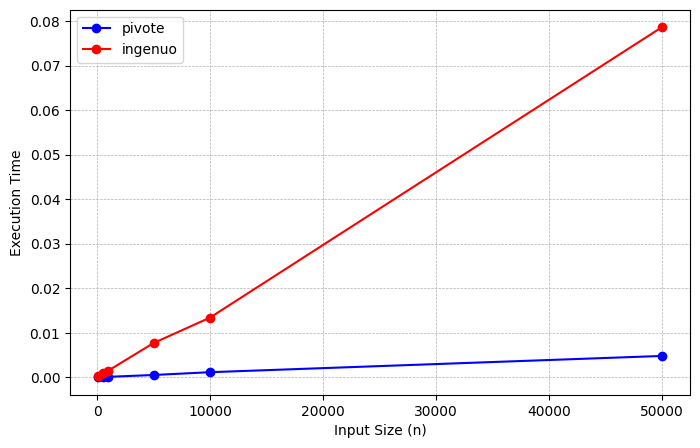

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
plt.plot(sizes_pivote, times_pivote, marker='o', linestyle='-', color='b', label='pivote')
plt.plot(sizes_ingenuo, times_ingenuo, marker='o', linestyle='-', color='r', label='ingenuo')



plt.xlabel("Input Size (n)")
plt.ylabel("Execution Time")
plt.title("")
plt.legend()
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

plt.show()

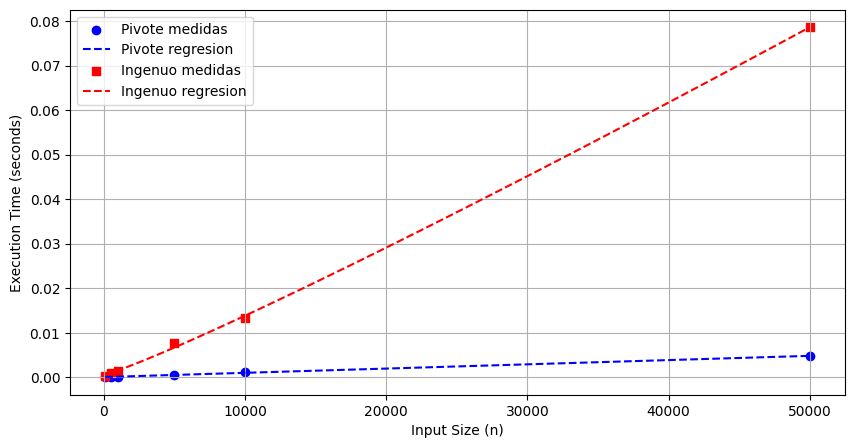

In [55]:
from scipy.optimize import curve_fit

# Define fitting functions
def linear_fit(n, a, b):
    return a * n + b

def nlogn_fit(n, a, b):
    return a * n * np.log(n) + b

# Fit the data
lin_params, _ = curve_fit(linear_fit, sizes_pivote, times_pivote)
nlogn_params, _ = curve_fit(nlogn_fit, sizes_ingenuo, times_ingenuo)

# Generate smooth curves
smooth_sizes = np.linspace(min(sizes_pivote), max(sizes_pivote), 100)
lin_fit_values = linear_fit(smooth_sizes, *lin_params)
nlogn_fit_values = nlogn_fit(smooth_sizes, *nlogn_params)

# Plot results
plt.figure(figsize=(10, 5))
plt.scatter(sizes_pivote, times_pivote, label='Pivote medidas', marker='o', color='blue')
plt.plot(smooth_sizes, lin_fit_values, label='Pivote regresion', linestyle='--', color='blue')
plt.scatter(sizes_pivote, times_ingenuo, label='Ingenuo medidas', marker='s', color='red')
plt.plot(smooth_sizes, nlogn_fit_values, label='Ingenuo regresion', linestyle='--', color='red')
plt.xlabel('Input Size (n)')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.grid()
plt.show()
